In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
# Importing the dataset
dataset = pd.read_csv('youtube.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

In [3]:
test_dataset = pd.read_csv('test.csv')
y_test = test_dataset.iloc[:, 1].values
y_test = y_test.flatten()

In [4]:
def printDistances(distances, token1Length, token2Length):
    for t1 in range(token1Length + 1):
        for t2 in range(token2Length + 1):
            print(int(distances[t1][t2]), end=" ")
        print()

In [5]:
def levenshteinDistanceDP(token1, token2):
    
    if token1[-1] == '?' or '!' or '.':
        token1=token1.rstrip(token1[-1])
        
    if token2[-1] == '?' or '!' or '.':
        token2=token2.rstrip(token2[-1])
    
    sent1 = token1.split()
    sent2 = token2.split()
    
    distances = np.zeros((len(sent1) + 1, len(sent2) + 1))

    for t1 in range(len(sent1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(sent2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(sent1) + 1):
        for t2 in range(1, len(sent2) + 1):
            if (sent1[t1-1] == sent2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    
    return (int(distances[len(sent1)][len(sent2)]))

In [6]:
dict={}
for ind,tind in zip(dataset.index, test_dataset.index):
        dict.update({dataset['title'][ind] : levenshteinDistanceDP (dataset['title'][ind],test_dataset['title'][tind])})
        

In [7]:
key_list = list(dict.keys())
val_list = list(dict.values())

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec = precision_score(val_list, y_test, average = 'micro')
rec = recall_score(val_list, y_test, average = None)
fmes = f1_score(val_list, y_test, average = 'weighted')

ValueError: Found input variables with inconsistent numbers of samples: [944, 971]

In [9]:
print (prec)
print (rec[0])
print (fmes)

NameError: name 'prec' is not defined

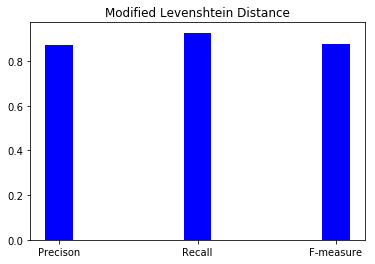

In [12]:
x = [1,2,3]
y = [prec, rec[0], fmes]
label = ['Precison', 'Recall', 'F-measure']
plt.bar(x,y, tick_label=label,width = 0.2, color= 'blue')
plt.title('Modified Levenshtein Distance')
plt.show()